## 6610450951 Tontawan Janthai SVM

## Import libs

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

## Read data

In [105]:
df = pd.read_excel("Psycology.xls")
df.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


In [106]:
df.columns

Index(['เพศ', 'อายุ', 'เคยมีแฟนมาแล้ว  (คน)',
       'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์', 'ระยะเวลาการนอน',
       'นิสิยการกินอาหาร', 'เคยคิดฆ่าตัวตาย',
       'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์',
       'ระดับความเครียดด้านการเงิน', 'เคยกินยานอนหลับ', 'ภาวะซึมเศร้า'],
      dtype='object')

### See if there is any suspicious values

In [107]:
genders = df['เพศ'].unique()
ages = df['อายุ'].unique()
girlfriend_amount = df['เคยมีแฟนมาแล้ว  (คน)'].unique()
exercise = df['จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์'].unique()
sleep_time = df['ระยะเวลาการนอน'].unique()
food_habit = df['นิสิยการกินอาหาร'].unique()
sucide = df['เคยคิดฆ่าตัวตาย'].unique()
library_time = df['จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์'].unique()
money_status = df['ระดับความเครียดด้านการเงิน'].unique()
sleeping_pill = df['เคยกินยานอนหลับ'].unique()
is_sadness = df['ภาวะซึมเศร้า'].unique()

print('เพศ ', genders)
print('อายุ ', ages)
print('เคยมีแฟนมาแล้ว  (คน) ', girlfriend_amount)
print('จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์ ', exercise)
print('ระยะเวลาการนอน', sleep_time)
print('นิสิยการกินอาหาร ', food_habit)
print('เคยคิดฆ่าตัวตาย ', sucide)
print('จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์ ', library_time)
print('ระดับความเครียดด้านการเงิน ', money_status)
print('เคยกินยานอนหลับ ', sleeping_pill)
print('ภาวะซึมเศร้า', is_sadness)

เพศ  ['Male' 'Female']
อายุ  [28 23 20 29 31 24 33 25 19 34 21 30 32 26 22 27 18]
เคยมีแฟนมาแล้ว  (คน)  [5 1 4 2 3 '?']
จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์  [3 2 5 4 '?' 1]
ระยะเวลาการนอน ['5-6 ชั่วโมง' 'มากกว่า 8 ชั่วโมง' 'น้อยกว่า 5 ชั่วโมง' '7-8 ชั่วโมง']
นิสิยการกินอาหาร  ['อาหารสุขภาพ' 'อาหารทั่วไป' 'Junkfood']
เคยคิดฆ่าตัวตาย  ['Yes' 'No']
จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์  [8 10 0 2 1 3 11 12 9 7 4 6 '?' 5]
ระดับความเครียดด้านการเงิน  [3 4 5 '?' 1 2]
เคยกินยานอนหลับ  ['Yes' 'No']
ภาวะซึมเศร้า ['Yes' 'No']


### Ignore all rows that has '?' in it

In [108]:
#Before
print(f"Data size before cut is {df.shape[0]}")

#cut
df = df[~df.isin(['?']).any(axis=1)]

#After
print(f"Data size after cut is {df.shape[0]}")

Data size before cut is 502
Data size after cut is 467


### Data Mapping

In [110]:
df['เพศ'] = df['เพศ'].replace({'Male': 1, 'Female': 0})

df['ระยะเวลาการนอน'] = df['ระยะเวลาการนอน'].replace({
    '5-6 ชั่วโมง': 5.5,
    'มากกว่า 8 ชั่วโมง': 8.5,
    'น้อยกว่า 5 ชั่วโมง': 4.5,
    '7-8 ชั่วโมง': 7.5
})

df['นิสิยการกินอาหาร'] = df['นิสิยการกินอาหาร'].replace({
    'อาหารสุขภาพ': 0, 
    'อาหารทั่วไป': 1, 
    'Junkfood': 2
})

df['เคยคิดฆ่าตัวตาย'] = df['เคยคิดฆ่าตัวตาย'].replace({'Yes': 1, 'No': 0})

df['เคยกินยานอนหลับ'] = df['เคยกินยานอนหลับ'].replace({'Yes': 1, 'No': 0})
df['ภาวะซึมเศร้า'] = df['ภาวะซึมเศร้า'].replace({'Yes': 1, 'No': 0})

df.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,1,28,5,3,5.5,0,1,8,3,1,1
1,1,23,5,2,8.5,1,0,10,4,0,1
2,0,23,1,3,4.5,0,1,0,3,0,0
3,0,20,5,5,8.5,2,1,2,5,0,1
4,1,29,4,3,8.5,2,1,1,3,0,1


# Rename Columns

In [113]:
cl = {
    'เพศ': 'Sex',
    'อายุ': 'Age',
    'เคยมีแฟนมาแล้ว  (คน)': 'GirlfriendCount',
    'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์': 'ExercisePerWeek',
    'ระยะเวลาการนอน': 'SleepingTime',
    'นิสิยการกินอาหาร': 'FoodEatingBehavior',
    'เคยคิดฆ่าตัวตาย': 'SuicidalThoughts',
    'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์': 'LibraryTimePerWeek',
    'ระดับความเครียดด้านการเงิน': 'MoneyStress',
    'เคยกินยานอนหลับ': 'SleepingPills',
    'ภาวะซึมเศร้า': 'Sadness'
}
df = df.rename(columns=cl)
df.head()

,Sex,Age,GirlfriendCount,ExercisePerWeek,SleepingTime,FoodEatingBehavior,SuicidalThoughts,LibraryTimePerWeek,MoneyStress,SleepingPills,Sadness
0,1,28,5,3,5.5,0,1,8,3,1,1
1,1,23,5,2,8.5,1,0,10,4,0,1
2,0,23,1,3,4.5,0,1,0,3,0,0
3,0,20,5,5,8.5,2,1,2,5,0,1
4,1,29,4,3,8.5,2,1,1,3,0,1


# Prepare Training data

In [114]:
X = df.drop('Sadness', axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X.astype(float))
y = df['Sadness'].values

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# SVM

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

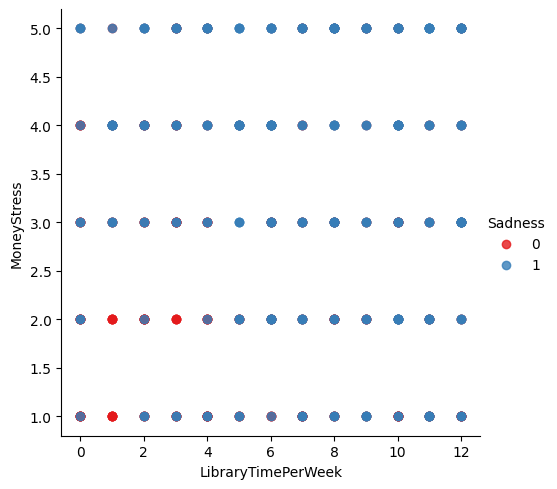

In [121]:
sns.lmplot(x='LibraryTimePerWeek', y='MoneyStress', data=df, hue='Sadness', palette='Set1', fit_reg=False)

# Predict 

In [130]:
y_pred = svm.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual Sadness': y_test,
    'Predicted Sadness': y_pred
})

comparison_df = comparison_df.reset_index(drop=True)
comparison_df

,Actual Sadness,Predicted Sadness
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
89,1,1
90,1,1
91,1,1
92,0,0


# Accuracy

In [131]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9787234042553191